In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- 데이터 설명
  - region: 지역
  - country: 국가
  - emissions: 메탄 배출량
  - type: 배출 유형
  - segment: 배출 유형 세부 항목
  - reason: 배출 원인
  - baseYear: 기준 연도
  - notes: 추가 설명


In [202]:
# kaggle 데이터 사용 (출처 : 국제에너지기구(International Energy Agency))
df = pd.read_csv("../data/Methane_final.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


### 데이터 기준 시점 분류


In [203]:
df["baseYear"].unique()

array(['2019-2021', '2022'], dtype=object)

In [204]:
methane2019 = df[df["baseYear"] == "2019-2021"]
methane2022 = df[df["baseYear"] == "2022"]

In [205]:
methane2019["emissions"].describe()

count       315.000000
mean       1455.123599
std        9118.651532
min           0.051872
25%          23.845923
50%         149.169006
75%         635.284546
max      141953.765625
Name: emissions, dtype: float64

In [206]:
methane2022["emissions"].describe()

count      1233.000000
mean        435.844535
std        4183.397653
min           0.000459
25%           1.732090
50%          14.860100
75%          75.208603
max      133350.984375
Name: emissions, dtype: float64

In [207]:
# 메탄 배출량이 평균 이상인 데이터 산출 함수
def get_emissions(df):
    # 메탄 배출이 평균 이상인 데이터 추출
    new_df = df[df["emissions"] > df["emissions"].mean()]
    # 배출량 내림차순 정렬
    new_df = new_df.sort_values(by="emissions", ascending=False)
    # country 데이터 필터링
    filtered_df = new_df[
        (new_df["country"] != "World")
        & (new_df["country"] != "European Union")
        & (~new_df["country"].str.startswith("Other"))
    ]
    filtered_df.drop(columns="Unnamed: 0", inplace=True)
    return filtered_df

In [208]:
# 2019-2021 기간 동안의 메탄 배출량이 평균 이상이 데이터
filtered_methane2019 = get_emissions(methane2019)
filtered_methane2019

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\4224137258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns="Unnamed: 0", inplace=True)


,region,country,emissions,type,segment,reason,baseYear,notes
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
710,Central and South America,Brazil,14020.088867,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
480,Asia Pacific,China,10424.141602,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
502,Asia Pacific,India,5551.760742,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
618,Asia Pacific,Pakistan,5319.456055,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1408,North America,United States,5117.928223,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
523,Asia Pacific,Indonesia,4568.938477,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
1491,Russia & Caspian,Russia,3931.244385,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [209]:
# 2022 기간 동안의 메탄 배출량이 평균 이상이 데이터
filtered_methane2022 = get_emissions(methane2022)
filtered_methane2022

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\4224137258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns="Unnamed: 0", inplace=True)


,region,country,emissions,type,segment,reason,baseYear,notes
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1489,Russia & Caspian,Russia,18078.083984,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1406,North America,United States,16769.630859,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
477,Asia Pacific,China,14809.000000,Energy,Steam coal,All,2022,Not available
1192,Middle East,Iran,5629.822266,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
...,...,...,...,...,...,...,...,...
160,Africa,Ethiopia,462.364014,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
301,Africa,Nigeria,458.352997,Energy,Onshore oil,Vented,2022,Not available
1176,Middle East,Iran,456.549011,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
1322,Middle East,United Arab Emirates,441.036011,Energy,Offshore oil,Vented,2022,Not available


In [210]:
filtered_methane2019["country"].unique()

array(['China', 'India', 'Brazil', 'United States', 'Pakistan',
       'Indonesia', 'Russia', 'Argentina', 'Australia', 'Mexico',
       'Bangladesh', 'Vietnam', 'Nigeria', 'Thailand', 'Ethiopia',
       'Colombia', 'Philippines', 'France', 'Sudan'], dtype=object)

In [211]:
filtered_methane2022["country"].unique()

array(['China', 'Russia', 'United States', 'Iran', 'India', 'Indonesia',
       'Turkmenistan', 'Nigeria', 'Saudi Arabia', 'Kazakhstan', 'Algeria',
       'Venezuela', 'Canada', 'Iraq', 'Australia', 'Brazil', 'Libya',
       'Mexico', 'United Arab Emirates', 'Argentina', 'South Africa',
       'Qatar', 'Kuwait', 'Egypt', 'Pakistan', 'Oman', 'Poland',
       'Uzbekistan', 'Colombia', 'Angola', 'Ukraine', 'Thailand',
       'Malaysia', 'Ethiopia'], dtype=object)

In [212]:
filtered_methane2019[:10]

,region,country,emissions,type,segment,reason,baseYear,notes
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
710,Central and South America,Brazil,14020.088867,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
480,Asia Pacific,China,10424.141602,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
502,Asia Pacific,India,5551.760742,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
618,Asia Pacific,Pakistan,5319.456055,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1408,North America,United States,5117.928223,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
523,Asia Pacific,Indonesia,4568.938477,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
1491,Russia & Caspian,Russia,3931.244385,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [213]:
filtered_methane2022[:10]

,region,country,emissions,type,segment,reason,baseYear,notes
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1489,Russia & Caspian,Russia,18078.083984,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1406,North America,United States,16769.630859,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
477,Asia Pacific,China,14809.000000,Energy,Steam coal,All,2022,Not available
1192,Middle East,Iran,5629.822266,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
462,Asia Pacific,China,5418.770020,Energy,Coking coal,All,2022,Not available
500,Asia Pacific,India,5185.236328,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
521,Asia Pacific,Indonesia,5080.369141,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1484,Russia & Caspian,Russia,4784.250000,Energy,Onshore oil,Vented,2022,Not available
1508,Russia & Caspian,Turkmenistan,4740.041016,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...


In [214]:
# 매탄 배출량이 평균 이상인 나라 중 개별 지역 값의 비중
filtered_methane2019["region"].value_counts(normalize=True)

region
Asia Pacific                 0.461538
Central and South America    0.153846
North America                0.153846
Africa                       0.115385
Russia & Caspian             0.076923
Europe                       0.038462
Name: proportion, dtype: float64

In [215]:
filtered_methane2022["region"].value_counts(normalize=True)

region
Asia Pacific                 0.197917
Russia & Caspian             0.187500
Middle East                  0.187500
Africa                       0.166667
North America                0.156250
Central and South America    0.083333
Europe                       0.020833
Name: proportion, dtype: float64

<Axes: xlabel='emissions', ylabel='region'>

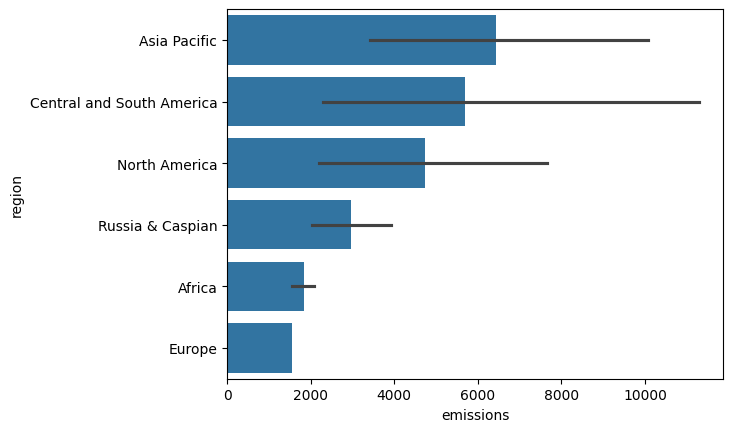

In [216]:
sns.barplot(filtered_methane2019, x="emissions", y="region")

<Axes: xlabel='emissions', ylabel='region'>

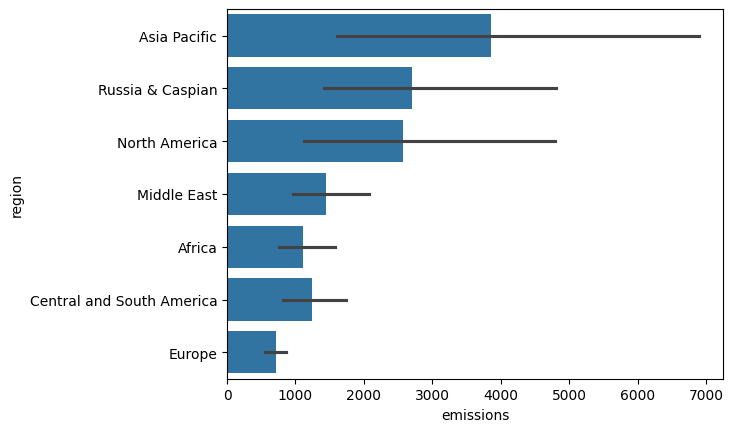

In [217]:
sns.barplot(filtered_methane2022, x="emissions", y="region")

In [218]:
filtered_methane2019["country"].values

array(['China', 'India', 'Brazil', 'China', 'United States', 'India',
       'Pakistan', 'United States', 'Indonesia', 'Russia', 'Brazil',
       'Indonesia', 'Argentina', 'Australia', 'Mexico', 'Bangladesh',
       'Vietnam', 'Nigeria', 'Thailand', 'Russia', 'Mexico', 'Ethiopia',
       'Colombia', 'Philippines', 'France', 'Sudan'], dtype=object)

In [219]:
filtered_methane2022["country"].values

array(['China', 'Russia', 'United States', 'China', 'Iran', 'China',
       'India', 'Indonesia', 'Russia', 'Turkmenistan', 'United States',
       'Indonesia', 'United States', 'Nigeria', 'Saudi Arabia',
       'Kazakhstan', 'Russia', 'Algeria', 'Venezuela', 'Russia', 'India',
       'Canada', 'Iraq', 'Australia', 'Russia', 'Iran', 'United States',
       'United States', 'Brazil', 'Libya', 'Mexico', 'Venezuela',
       'United Arab Emirates', 'Saudi Arabia', 'Iraq', 'Turkmenistan',
       'India', 'Nigeria', 'Argentina', 'Turkmenistan', 'Russia',
       'South Africa', 'Russia', 'United States', 'Russia', 'Algeria',
       'Qatar', 'Iran', 'South Africa', 'Kazakhstan', 'Canada', 'Russia',
       'Kuwait', 'China', 'Egypt', 'United States', 'Brazil', 'Pakistan',
       'Libya', 'Australia', 'Iraq', 'China', 'Oman', 'Poland',
       'Saudi Arabia', 'United States', 'China', 'Uzbekistan', 'Colombia',
       'Australia', 'Kuwait', 'Canada', 'Iran', 'Nigeria', 'Russia',
       'Kazakhstan

In [220]:
df1 = filtered_methane2019[filtered_methane2019["region"] == "Asia Pacific"]
df1["type"].value_counts(normalize=True)

type
Agriculture    0.75
Waste          0.25
Name: proportion, dtype: float64

In [221]:
df2 = filtered_methane2022[filtered_methane2022["region"] == "Asia Pacific"]
df2["type"].value_counts(normalize=True)

type
Energy    1.0
Name: proportion, dtype: float64

In [222]:
df3 = filtered_methane2019[filtered_methane2019["country"] == "China"]
df3["type"].value_counts(normalize=True)

type
Agriculture    0.5
Waste          0.5
Name: proportion, dtype: float64

In [223]:
df3 = filtered_methane2022[filtered_methane2022["country"] == "China"]
df3["type"].value_counts(normalize=True)

type
Energy    1.0
Name: proportion, dtype: float64